In [1]:
pip install fastai gradio

  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl (11.4 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import os
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

In [3]:
import torch
import torchvision

/Applications/anaconda3/lib/python3.12/site-packages/torch/utils/_pytree.py:185: FutureWarning: optree is installed but the version is too old to support PyTorch Dynamo in C++ pytree. C++ pytree support is disabled. Please consider upgrading optree using `python3 -m pip install --upgrade 'optree>=0.13.0'`.
  warnings.warn(


In [4]:
pip install --upgrade torchvision

  Using cached torchvision-0.22.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.1 kB)
  Using cached torch-2.7.0-cp312-none-macosx_11_0_arm64.whl.metadata (29 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
Using cached torchvision-0.22.0-cp312-cp312-macosx_11_0_arm64.whl (1.9 MB)
Using cached torch-2.7.0-cp312-none-macosx_11_0_arm64.whl (68.6 MB)
Using cached sympy-1.14.0-py3-none-any.whl (6.3 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.13.1
    Uninstalling sympy-1.13.1:
      Successfully uninstalled sympy-1.13.1
  Attempting uninstall: torch
    Found existing installation: torch 2.6.0
    Uninstalling torch-2.6.0:
      Successfully uninstalled torch-2.6.0
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.21.0
    Uninstalling torchvision-0.21.0:
      Successfully uninstalled torchvision-0.21.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed.

In [5]:
pip install --upgrade torch torchvision

Note: you may need to restart the kernel to use updated packages.


In [6]:
print(torch.__version__)
print(torchvision.__version__)

2.6.0
0.21.0


In [7]:
import fastai

In [8]:
pip install torchvision==0.13.1

ERROR: Ignored the following yanked versions: 0.1.6, 0.1.7, 0.1.8, 0.1.9, 0.2.0, 0.2.1, 0.2.2, 0.2.2.post2, 0.2.2.post3
ERROR: Could not find a version that satisfies the requirement torchvision==0.13.1 (from versions: 0.17.0, 0.17.1, 0.17.2, 0.18.0, 0.18.1, 0.19.0, 0.19.1, 0.20.0, 0.20.1, 0.21.0, 0.22.0)
ERROR: No matching distribution found for torchvision==0.13.1
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install --upgrade fastai torchvision

  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached torch-2.6.0-cp312-none-macosx_11_0_arm64.whl.metadata (28 kB)
INFO: pip is looking at multiple versions of torchvision to determine which version is compatible with other requirements. This could take a while.
  Using cached torchvision-0.22.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.1 kB)
  Using cached torchvision-0.21.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.1 kB)
  Using cached sympy-1.13.1-py3-none-any.whl.metadata (12 kB)
Using cached torchvision-0.21.0-cp312-cp312-macosx_11_0_arm64.whl (1.8 MB)
Using cached torch-2.6.0-cp312-none-macosx_11_0_arm64.whl (66.5 MB)
Using cached sympy-1.13.1-py3-none-any.whl (6.2 MB)
Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl (11.4 MB)
  Attempting uninstall: sympy
    Found existing installation: sympy 1.14.0
    Uninstalling sympy-1.14.0:
      Successfully uninstalled sympy-1.14.0
  Attempting uninstall: torch
    Found existi

In [10]:
from fastai.vision.all import *
import gradio as gr
from PIL import Image
import torch

# Force Fastai to use CPU
defaults.device = torch.device('cpu')

# Set path to dataset
path = Path('Training kopyası/Cancer/Training')


In [11]:
import os
os.environ['PYTORCH_ENABLE_MPS_FALLBACK'] = '1'

In [12]:
torch.device('cpu')
defaults.device = torch.device('cpu')  # Force FastAI to use CPU

In [13]:
torch.backends.mps.is_available = lambda: False
defaults.device = torch.device('cpu')

In [14]:
# Step 2: Define a DataBlock
skin_cancer_block = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224)
)

In [15]:
device = torch.device("cpu")

In [ ]:
#32 Batch Size is the best according to the Andrej Karpathy.
dls = skin_cancer_block.dataloaders(path, bs=32, device=device)


In [17]:
dls.to(device)  # ⬅️ Bu önemli

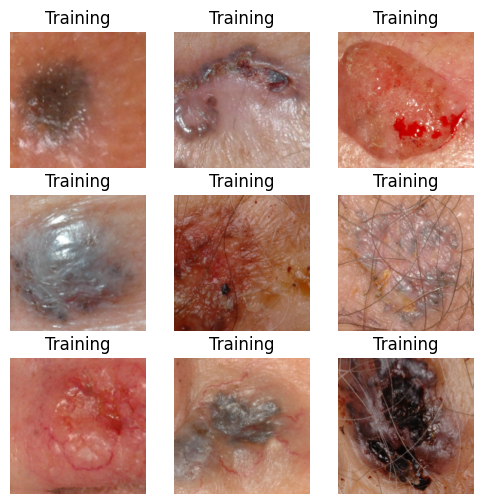

In [18]:
# Show a batch of images (optional)
dls.show_batch(max_n=9, figsize=(6, 6))

In [19]:
from torchvision.models import resnet50, ResNet50_Weights

In [20]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cpu
!pip install fastai

Looking in indexes: https://download.pytorch.org/whl/cpu
  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl (11.4 MB)


In [21]:
# Build and train model
learn = vision_learner(dls, resnet50, weights=ResNet50_Weights.DEFAULT, metrics=accuracy)

In [22]:
from fastai.learner import Learner

In [23]:
learn.model.to(device)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [24]:
pip install --upgrade torch torchvision torchaudio fastai

  Using cached torch-2.7.0-cp312-none-macosx_11_0_arm64.whl.metadata (29 kB)
  Using cached torchvision-0.22.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.1 kB)
  Using cached torchaudio-2.7.0-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.6 kB)
  Using cached sympy-1.14.0-py3-none-any.whl.metadata (12 kB)
  Using cached pandas-2.2.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (89 kB)
INFO: pip is looking at multiple versions of fastai to determine which version is compatible with other requirements. This could take a while.
  Using cached fastai-2.8.1-py3-none-any.whl.metadata (9.5 kB)
  Using cached fastai-2.7.19-py3-none-any.whl.metadata (9.2 kB)
  Using cached fastcore-1.7.29-py3-none-any.whl.metadata (3.6 kB)
  Using cached fastai-2.7.18-py3-none-any.whl.metadata (9.1 kB)
  Using cached fastai-2.7.17-py3-none-any.whl.metadata (9.1 kB)
INFO: pip is still looking at multiple versions of fastai to determine which version is compatible with other requirements. This could take a while.

In [ ]:
print(next(learn.model.parameters()).device)  


cpu


In [26]:
learn.freeze()

In [ ]:
len(learn.dls.train)  


1

In [ ]:
len(learn.dls.valid)  

1

In [29]:
print(learn.model)
print(learn.dls)

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [30]:
from fastai.callback.tracker import SaveModelCallback


In [31]:
path = untar_data(URLs.MNIST_SAMPLE)
dls = ImageDataLoaders.from_folder(path)
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fit_one_cycle(1)

/Applications/anaconda3/lib/python3.12/site-packages/fastai/vision/learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code


epoch,train_loss,valid_loss,accuracy,time
0,0.185353,0.100092,0.964671,00:18


In [32]:
learn.fit_one_cycle(3, lr_max=3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.088713,0.055232,0.986752,00:11
1,0.033229,0.027323,0.989205,00:10
2,0.018404,0.024228,0.991659,00:10


In [33]:
learn.unfreeze()

In [34]:
learn.fit_one_cycle(2, lr_max=3e-4)#aka. Karpathy Constant

epoch,train_loss,valid_loss,accuracy,time
0,0.030860,0.006458,0.998528,00:19
1,0.007422,0.004275,0.998528,00:18


In [35]:
def predict(img):
    pred, pred_idx, probs = learn.predict(img)
    label = "Skin Cancer" if str(pred).lower() == "cancer" else "Non-Skin Cancer"
    confidence = probs[pred_idx].item() * 100
    return img, f"Prediction: {label} (Confidence: {confidence:.2f}%)"

In [ ]:
gr.Interface(
    fn=predict,
    inputs=gr.Image(type="pil"),
    outputs=[gr.Image(type="pil"), gr.Text()],
    title="Skin Cancer Classification with Fastai",
    description="Upload a skin image to classify cancer vs. non-cancer."
).launch()

* Running on local URL:  http://127.0.0.1:7860
* To create a public link, set `share=True` in `launch()`.
